In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [8]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Predictive Analysis/Cross Validation/Copy of Admission Chance.csv')

bf = pd.read_csv('/content/drive/MyDrive/Predictive Analysis/Cross Validation/Copy of Bank Churn Modelling.csv')

ef = pd.read_csv('/content/drive/MyDrive/Predictive Analysis/Cross Validation/Copy of Iris.csv')

hf = pd.read_csv('/content/drive/MyDrive/Predictive Analysis/Cross Validation/Copy of Social_Network_Ads.csv')



In [5]:
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
bf.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
ef.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
hf.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# **Addmission Chances(Regression)**

In [12]:
print(df.shape)

(400, 9)


In [13]:
print(df.describe)

<bound method NDFrame.describe of      Serial No  GRE Score  TOEFL Score  University Rating   SOP  LOR   CGPA  \
0            1        337          118                  4   4.5   4.5  9.65   
1            2        324          107                  4   4.0   4.5  8.87   
2            3        316          104                  3   3.0   3.5  8.00   
3            4        322          110                  3   3.5   2.5  8.67   
4            5        314          103                  2   2.0   3.0  8.21   
..         ...        ...          ...                ...   ...   ...   ...   
395        396        324          110                  3   3.5   3.5  9.04   
396        397        325          107                  3   3.0   3.5  9.11   
397        398        330          116                  4   5.0   4.5  9.45   
398        399        312          103                  3   3.5   4.0  8.78   
399        400        333          117                  4   5.0   4.0  9.66   

     Research  Ch

In [14]:
print(df.isnull().sum())

Serial No            0
GRE Score            0
TOEFL Score          0
University Rating    0
 SOP                 0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


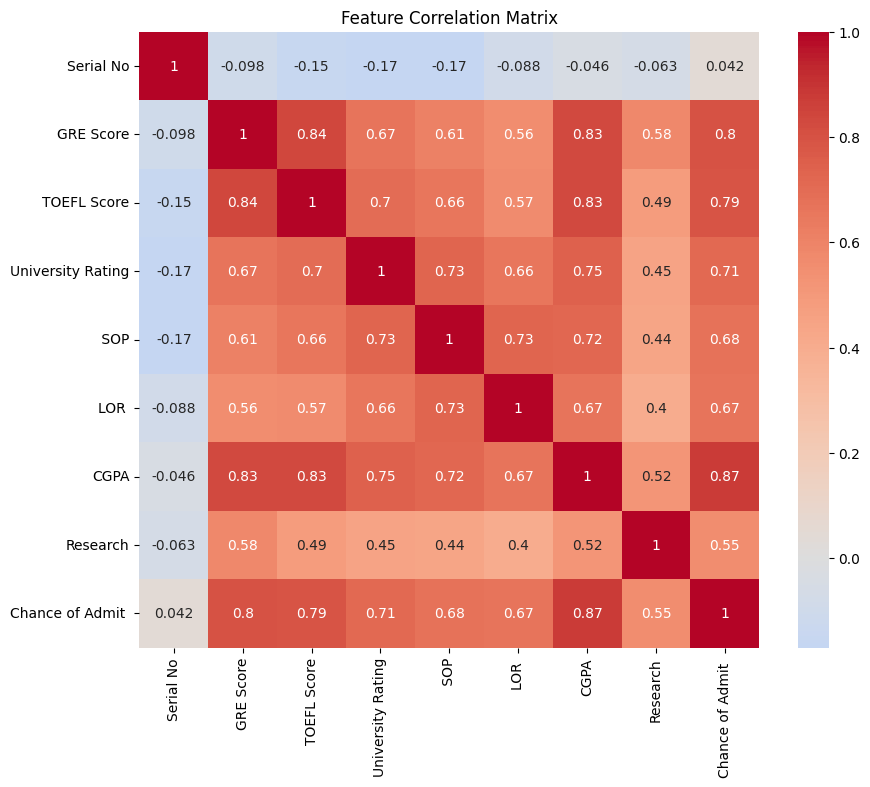

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()

In [20]:
print("Column names in DataFrame:", df.columns.tolist())

Column names in DataFrame: ['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [25]:
df.columns = df.columns.str.strip()

# Now try again
X = df.drop(['Serial No', 'Chance of Admit'], axis=1)
y = df['Chance of Admit']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'SVR': SVR(kernel='rbf')
}


In [30]:
# Evaluate models using 5-fold cross-validation
results = {}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train,
                               cv=kfold, scoring='r2')
    results[name] = {
        'Mean R2': cv_scores.mean(),
        'Std R2': cv_scores.std()
    }


In [31]:
# Display cross-validation results
cv_results = pd.DataFrame(results).T
print("\nCross-validation results (R² score):")
display(cv_results.sort_values('Mean R2', ascending=False))


Cross-validation results (R² score):


,Mean R2,Std R2
Ridge Regression,0.772577,0.039880
Linear Regression,0.772207,0.040317
Random Forest,0.726707,0.067206
Gradient Boosting,0.716288,0.047161
XGBoost,0.675121,0.072881
SVR,0.636553,0.075057
Lasso Regression,0.216730,0.016483


In [32]:
# Train the best model on full training data and evaluate on test set
best_model_name = cv_results['Mean R2'].idxmax()
best_model = models[best_model_name]

print(f"\nTraining and evaluating {best_model_name}...")
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)


Training and evaluating Ridge Regression...


In [33]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nTest Set Performance:")
print(f"- MSE: {mse:.4f}")
print(f"- RMSE: {rmse:.4f}")
print(f"- MAE: {mae:.4f}")
print(f"- R²: {r2:.4f}")



Test Set Performance:
- MSE: 0.0046
- RMSE: 0.0680
- MAE: 0.0480
- R²: 0.8209


In [35]:
# %%
# Feature importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    importances = best_model.feature_importances_
    features = X.columns
    indices = np.argsort(importances)[::-1]

    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
    plt.xlim([-1, X.shape[1]])
    plt.tight_layout()
    plt.show()

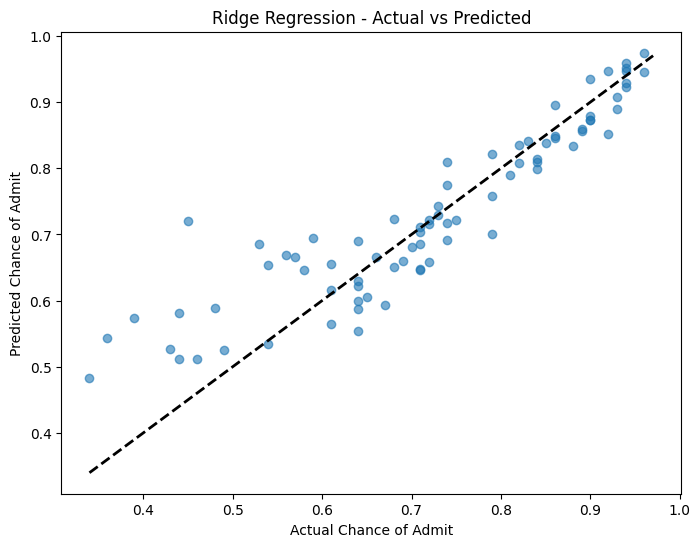

In [36]:
# %%
# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title(f'{best_model_name} - Actual vs Predicted')
plt.show()